In [1]:
# import python libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, re, time, tqdm # import utility libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input

from tensorflow.keras.applications import VGG19
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.layers import LSTM, GRU, Conv2D, MaxPooling2D, Dense, Activation, Flatten
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix

2023-05-24 09:46:31.387947: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/home/krishnatejaswis/.local/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

In [2]:

for dirname, _, filenames in os.walk('/home/krishnatejaswis/VSCode/LungScan2O/CT'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/home/krishnatejaswis/VSCode/LungScan2O/CT/modelOne.h5
/home/krishnatejaswis/VSCode/LungScan2O/CT/COVID-CT-MetaInfo.xlsx
/home/krishnatejaswis/VSCode/LungScan2O/CT/modelOne.json
/home/krishnatejaswis/VSCode/LungScan2O/CT/CT_NonCOVID/1263.png
/home/krishnatejaswis/VSCode/LungScan2O/CT/CT_NonCOVID/1923.png
/home/krishnatejaswis/VSCode/LungScan2O/CT/CT_NonCOVID/76%2.jpg
/home/krishnatejaswis/VSCode/LungScan2O/CT/CT_NonCOVID/39%7.jpg
/home/krishnatejaswis/VSCode/LungScan2O/CT/CT_NonCOVID/1298.png
/home/krishnatejaswis/VSCode/LungScan2O/CT/CT_NonCOVID/36%1.jpg
/home/krishnatejaswis/VSCode/LungScan2O/CT/CT_NonCOVID/1059.png
/home/krishnatejaswis/VSCode/LungScan2O/CT/CT_NonCOVID/1702.png
/home/krishnatejaswis/VSCode/LungScan2O/CT/CT_NonCOVID/14%3.jpg
/home/krishnatejaswis/VSCode/LungScan2O/CT/CT_NonCOVID/34.jpg
/home/krishnatejaswis/VSCode/LungScan2O/CT/CT_NonCOVID/76%0.jpg
/home/krishnatejaswis/VSCode/LungScan2O/CT/CT_NonCOVID/17%1.jpg
/home/krishnatejaswis/VSCode/LungScan2O/CT/CT_NonCOVID/5

In [3]:
# directory with training covid pictures
train_covid_dir = os.path.join('/home/krishnatejaswis/VSCode/LungScan2O/CT/CT_COVID')

# Directory with training human pictures
train_non_covid_dir = os.path.join('/home/krishnatejaswis/VSCode/LungScan2O/CT/CT_NonCOVID')

print(train_covid_dir)
print(train_non_covid_dir)

/home/krishnatejaswis/VSCode/LungScan2O/CT/CT_COVID
/home/krishnatejaswis/VSCode/LungScan2O/CT/CT_NonCOVID


In [4]:
# print images of covid images
train_covid_names = os.listdir(train_covid_dir)
print(f'TRAIN SET COVID: {train_covid_names[:10]}')

print('')

# print names of non covid images
train_non_covid_names = os.listdir(train_non_covid_dir)
print(f'TRAIN SET NON-COVID: {train_non_covid_names[:10]}')

TRAIN SET COVID: ['2020.03.21.20040691-p18-67-7.png', '2020.03.07.20031393-p7-50%2.png', '2020.02.27.20027557-p25-137%2.png', '2020.03.04.20030395-p27-108%6.png', 'PIIS0140673620301549_0%0.png', '2020.02.25.20027763-p15-53%0.png', '2020.03.07.20031393-p7-50%0.png', '2020.03.10.20032136-p34-118_2%1.png', '2020.03.08.20031658-p15-104.png', '2020.02.23.20026856-p17-115%4.png']

TRAIN SET NON-COVID: ['1263.png', '1923.png', '76%2.jpg', '39%7.jpg', '1298.png', '36%1.jpg', '1059.png', '1702.png', '14%3.jpg', '34.jpg']


In [5]:
# printing total number of images in each directory
print(f'total training covid images: {len(os.listdir(train_covid_dir))}')
print(f'total training non-covid images: {len(os.listdir(train_non_covid_dir))}')

covid = len(os.listdir(train_covid_dir))
non_covid = len(os.listdir(train_non_covid_dir))
print('Total CT-scanned images in dataset: %s' % str(covid + non_covid))

total training covid images: 349
total training non-covid images: 397
Total CT-scanned images in dataset: 746


SyntaxError: not a PNG file (<string>)

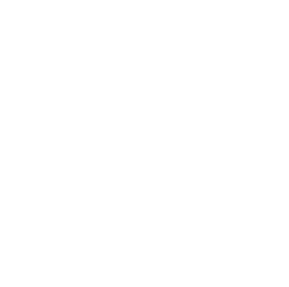

In [6]:

# parameters for our plot; we will output images in a 4x4 configuration
nrows, ncols = 4, 4

# index for iterating over images
pic_index = 0

# setting up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_normal_pix = [os.path.join(train_covid_dir, fname) 
                for fname in train_covid_names[pic_index-8:pic_index]]
next_malig_pix = [os.path.join(train_non_covid_dir, fname) 
                for fname in train_non_covid_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_normal_pix + next_malig_pix):
    
  # setting up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [7]:
data_dir = '/home/krishnatejaswis/VSCode/LungScan2O/CT'
X, Y = 224, 224
BATCH_SIZE = 32

# setting up the data generator for train and validation splits
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest'
                            )

# test_datagen = ImageDataGenerator(rescale=1/255.0)

training_data = datagen.flow_from_directory(data_dir,
                                    class_mode = "binary",
                                    target_size = (X, Y),
                                    color_mode="rgb",
                                    batch_size = BATCH_SIZE, 
                                    shuffle = False,
                                    subset='training',
                                    seed = 42
                                    )

validation_data = datagen.flow_from_directory(data_dir,
                                      class_mode = "binary",
                                      target_size = (X, Y),
                                      color_mode="rgb",
                                      batch_size = BATCH_SIZE, 
                                      shuffle = False,
                                      subset='validation',
                                      seed = 42)

Found 598 images belonging to 2 classes.
Found 148 images belonging to 2 classes.


In [8]:
import warnings
warnings.filterwarnings('ignore')

def nn_model():
    '''
    A function to make a deep convolutional neural network with convolutional, pooling and 
    fully-connected layers
    '''
    model = Sequential()
    
    model.add(Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu, 
                     input_shape=(X, Y, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu))
    model.add(MaxPooling2D((2, 2)))
    model.add(keras.layers.Dropout(0.4))

    model.add(Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.4))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(), 
                  loss=tf.keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    
    return model

model = nn_model()
model

2023-05-24 09:46:50.465091: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-24 09:46:50.509980: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-24 09:46:50.510482: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 56, 56, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        9

In [10]:
# setting up early stopping to stop training when max acc is reached
# we are using validation loss as parameter for monitoring the training process

# setup an early stopping object for monitoring model performance
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=3)

# setting up the csv logger
logger = CSVLogger('logs.csv', append=True)

# fitting the model to training data and validating on validation data
history = model.fit(
    training_data,
    validation_data=validation_data,
    epochs=10,
    callbacks=[early_stopping, logger]
)

Epoch 1/10


2023-05-24 09:46:59.081875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-24 09:46:59.819750: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-05-24 09:47:01.543731: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8800
2023-05-24 09:47:03.031401: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f4ee971e860 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-24 09:47:03.031429: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor de

19/19 [==============================] - ETA: 0s - loss: 0.9727 - accuracy: 0.4448

2023-05-24 09:47:11.953739: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


19/19 [==============================] - 15s 476ms/step - loss: 0.9727 - accuracy: 0.4448 - val_loss: 0.6931 - val_accuracy: 0.4662
Epoch 2/10
19/19 [==============================] - 7s 385ms/step - loss: 0.6957 - accuracy: 0.4231 - val_loss: 0.6932 - val_accuracy: 0.4662
Epoch 3/10
19/19 [==============================] - 7s 389ms/step - loss: 0.6937 - accuracy: 0.4415 - val_loss: 0.6933 - val_accuracy: 0.4662
Epoch 4/10
19/19 [==============================] - 8s 396ms/step - loss: 0.6938 - accuracy: 0.4532 - val_loss: 0.6929 - val_accuracy: 0.5338
Epoch 5/10
19/19 [==============================] - 7s 395ms/step - loss: 0.6930 - accuracy: 0.5268 - val_loss: 0.6927 - val_accuracy: 0.5338
Epoch 6/10
 8/19 [===========>..................] - ETA: 3s - loss: 0.6943 - accuracy: 0.3906

KeyboardInterrupt: 

In [33]:
model = Sequential()
vgg19 = VGG19(input_shape=(224, 224, 3),
                      weights='imagenet',
                      include_top=False)

# swtting traimable to false
for layer in vgg19.layers:
    layer.trainable=False

In [34]:
x = Flatten()(vgg19.output)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)
model

In [35]:

x = GlobalAveragePooling2D()(vgg19.output)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
y = Dense(1, activation='sigmoid')(x)

model_2 = Model(inputs=vgg19.input, outputs=y)
model_2

In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
                  loss=tf.keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])

In [37]:
# setting up early stopping to stop training when max acc is reached
# we are using validation loss as parameter for monitoring the training process

# fitting the model to training data and validating on validation data
history = model.fit(
    training_data,
    validation_data=validation_data,
    epochs=60,
    callbacks=[logger]
)

Epoch 1/60


2023-05-18 12:19:47.437932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


19/19 [==============================] - ETA: 0s - loss: 5.6834 - accuracy: 0.3194

2023-05-18 12:20:47.024898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


19/19 [==============================] - 74s 4s/step - loss: 5.6834 - accuracy: 0.3194 - val_loss: 3.1815 - val_accuracy: 0.4662
Epoch 2/60
19/19 [==============================] - 73s 4s/step - loss: 1.7500 - accuracy: 0.5886 - val_loss: 1.6382 - val_accuracy: 0.4662
Epoch 3/60
19/19 [==============================] - 74s 4s/step - loss: 1.5555 - accuracy: 0.5184 - val_loss: 1.0932 - val_accuracy: 0.4662
Epoch 4/60
19/19 [==============================] - 75s 4s/step - loss: 1.1376 - accuracy: 0.4699 - val_loss: 0.8351 - val_accuracy: 0.4662
Epoch 5/60
19/19 [==============================] - 75s 4s/step - loss: 0.8916 - accuracy: 0.4682 - val_loss: 0.6714 - val_accuracy: 0.6689
Epoch 6/60
19/19 [==============================] - 75s 4s/step - loss: 1.1021 - accuracy: 0.5234 - val_loss: 0.6621 - val_accuracy: 0.5946
Epoch 7/60
19/19 [==============================] - 75s 4s/step - loss: 0.7486 - accuracy: 0.5117 - val_loss: 0.6823 - val_accuracy: 0.5541
Epoch 8/60
19/19 [=============

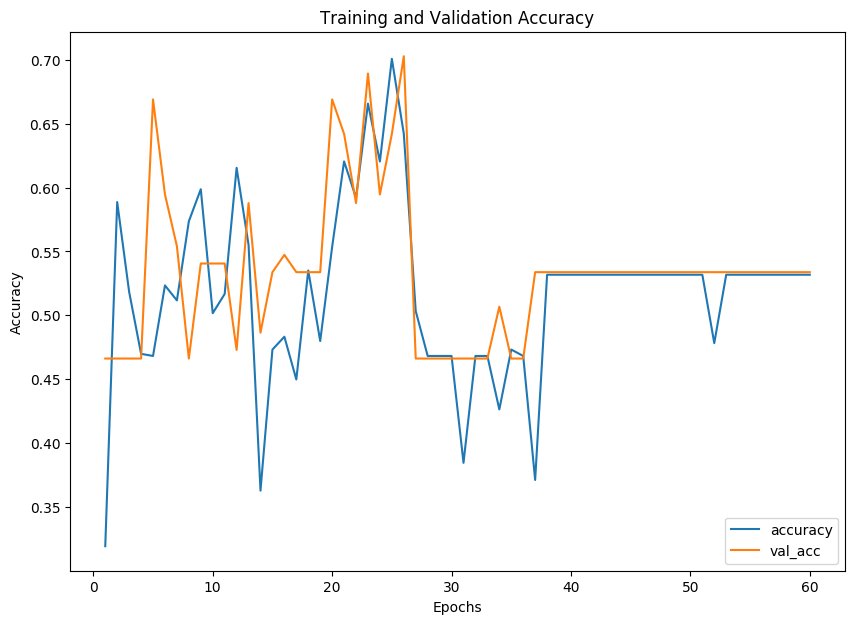

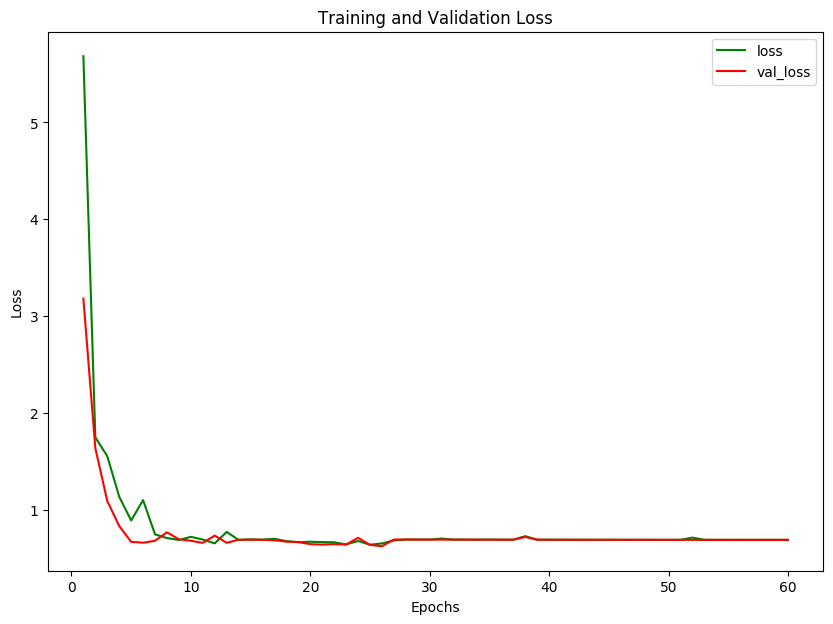

In [38]:
hist = history.history
plt.style.use('_classic_test_patch')

epochs = range(1, len(hist['loss']) + 1)
acc = hist['accuracy']
loss = hist['loss']
val_acc = hist['val_accuracy']
val_loss = hist['val_loss']

# plot loss versus accuracy
plt.figure(figsize=(10, 7))
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend(loc='lower right')

# plot validation versus accuract
plt.figure(figsize=(10, 7))
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

In [39]:
import json

In [40]:

model_json = model.to_json()
with open("modelOne.json", "w") as json_file:
    json_file.write(model_json)
model.save("/home/krishnatejaswis/VSCode/LungScan2O/CT/modelOne.h5")
print("Model Saved to the disk")

Model Saved to the disk


In [52]:
model = keras.models.load_model("/home/krishnatejaswis/VSCode/LungScan2O/CT/modelOne.h5")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [54]:

import cv2

image = cv2.imread("/home/krishnatejaswis/VSCode/LungScan2O/CT/CT_NonCOVID/4%5.jpg")
print(type(image))
image = cv2.resize(image, (224, 224))
print(type(image))



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [55]:
# Make predictions
predictions = model.predict(image.reshape(1, 224, 224, 3))

# Print the predictions
print(predictions)

1/1 [==============================] - 0s 281ms/step
[[0.8580846]]
